In [1]:
import glob
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import os, fnmatch

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

files = find('events*', '.\\data')

def find_event(keywords):
    global files
    file = list(filter(lambda x: keywords in x, files))
    return file

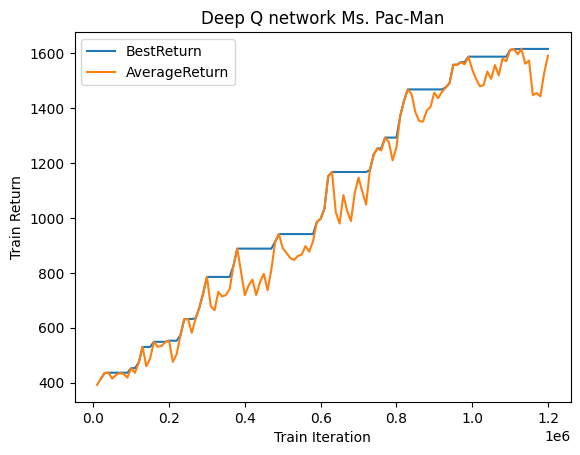

In [133]:
def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    Z = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            if v.tag == 'Train_BestReturn':
                Y.append(v.simple_value)
            if v.tag == 'Train_AverageReturn':
                Z.append(v.simple_value)
                
    return X, Y, Z

eventfile = 'data/q1_MsPacman-v0_06-10-2022_23-06-21/events.out.tfevents.1665122781.DESKTOP-NE5DITM'
X,Y,Z = get_section_results(eventfile)

plt.plot(X, [None,None]+Y, label='BestReturn')
plt.plot(X, [None]+Z, label='AverageReturn')
plt.xlabel('Train Iteration')
plt.ylabel('Train Return')
plt.legend()
plt.title('Deep Q network Ms. Pac-Man')
plt.savefig('images/DQN.png', dpi=300)

In [134]:
def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            if v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
                
    return X, Y

In [118]:
events = find_event('q1')
X, Y

['.\\data\\q1_MsPacman-v0_06-10-2022_23-06-21\\events.out.tfevents.1665122781.DESKTOP-NE5DITM']

In [ ]:
plt.plot(X, [None]+list(avg_Y), label='DQN')

plt.xlabel('Train Iteration')
plt.fill_between(X[1:], min_Y_db, max_Y_db,
                 color='orange', alpha=0.15)
plt.fill_between(X[1:], min_Y, max_Y,
                 color='#1f77b4', alpha=0.15)
plt.legend()
plt.title('Deep Q network vs Double Deep Q network')
plt.savefig('images/DQN.png', dpi=300)

In [92]:
find_event('q2')

['.\\data\\q2_doubledqn_1_LunarLander-v3_07-10-2022_16-03-01\\events.out.tfevents.1665183781.DESKTOP-NE5DITM',
 '.\\data\\q2_doubledqn_2_LunarLander-v3_07-10-2022_17-02-34\\events.out.tfevents.1665187354.DESKTOP-NE5DITM',
 '.\\data\\q2_doubledqn_3_LunarLander-v3_07-10-2022_17-02-40\\events.out.tfevents.1665187360.DESKTOP-NE5DITM',
 '.\\data\\q2_dqn_1_LunarLander-v3_07-10-2022_16-06-33\\events.out.tfevents.1665183993.DESKTOP-NE5DITM',
 '.\\data\\q2_dqn_2_LunarLander-v3_07-10-2022_16-06-46\\events.out.tfevents.1665184006.DESKTOP-NE5DITM',
 '.\\data\\q2_dqn_3_LunarLander-v3_07-10-2022_17-02-14\\events.out.tfevents.1665187334.DESKTOP-NE5DITM']

In [135]:
events = find_event('q2_dqn')
avg_Y = (np.array(get_section_results(events[0])[1]) + np.array(get_section_results(events[1])[1]) + np.array(get_section_results(events[2])[1]))/3
X = get_section_results(events[0])[0]
min_Y = np.min((np.array(get_section_results(events[0])[1]), np.array(get_section_results(events[1])[1]), np.array(get_section_results(events[2])[1])), axis=0)
max_Y = np.max((np.array(get_section_results(events[0])[1]), np.array(get_section_results(events[1])[1]), np.array(get_section_results(events[2])[1])), axis=0)

In [136]:
events = find_event('q2_double')
avg_Y_db = (np.array(get_section_results(events[0])[1]) + np.array(get_section_results(events[1])[1]) + np.array(get_section_results(events[2])[1]))/3
min_Y_db = np.min((np.array(get_section_results(events[0])[1]), np.array(get_section_results(events[1])[1]), np.array(get_section_results(events[2])[1])), axis=0)
max_Y_db = np.max((np.array(get_section_results(events[0])[1]), np.array(get_section_results(events[1])[1]), np.array(get_section_results(events[2])[1])), axis=0)

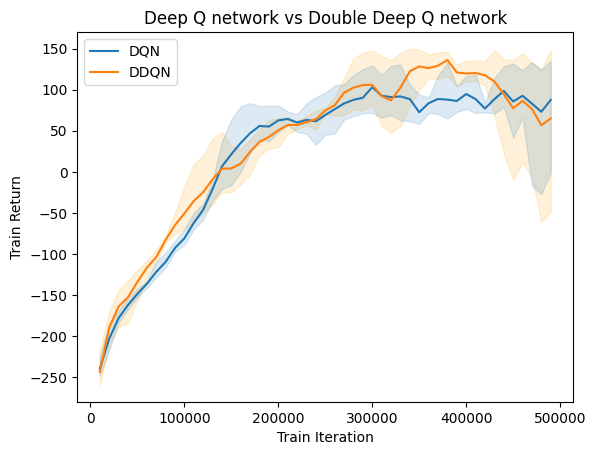

In [139]:
plt.plot(X, [None]+list(avg_Y), label='DQN')
plt.plot(X, [None]+list(avg_Y_db), label='DDQN')
plt.xlabel('Train Iteration')
plt.ylabel('Train Return')
plt.fill_between(X[1:], min_Y_db, max_Y_db,
                 color='orange', alpha=0.15)
plt.fill_between(X[1:], min_Y, max_Y,
                 color='#1f77b4', alpha=0.15)
plt.legend()
plt.title('Deep Q network vs Double Deep Q network')
plt.savefig('images/Q2.png', dpi=300)

In [143]:
path = find_event('q3')
path

['.\\data\\q3_hparam1_32hidden_size_LunarLander-v3_07-10-2022_18-30-36\\events.out.tfevents.1665192636.DESKTOP-NE5DITM',
 '.\\data\\q3_hparam2_128hidden_size_LunarLander-v3_07-10-2022_18-32-12\\events.out.tfevents.1665192732.DESKTOP-NE5DITM',
 '.\\data\\q3_hparam3_2layer_64_LunarLander-v3_07-10-2022_18-33-15\\events.out.tfevents.1665192795.DESKTOP-NE5DITM']

In [144]:
Y_32 = get_section_results(path[0])[1]
Y_128 = get_section_results(path[1])[1]
Y_2l_64 = get_section_results(path[2])[1]
X = get_section_results(path[2])[0]

In [154]:
Y_base = get_section_results(find_event('q2_dqn_1')[0])[1]

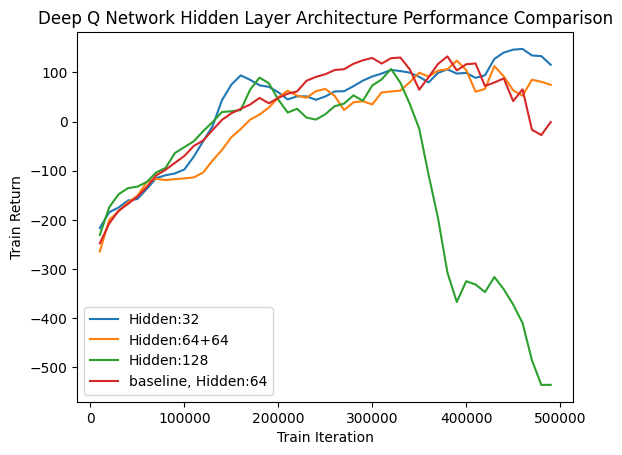

In [160]:
plt.plot(X, [None]+list(Y_32), label='Hidden:32')
plt.plot(X, [None]+list(Y_2l_64), label='Hidden:64+64')
plt.plot(X, [None]+list(Y_128), label='Hidden:128')
plt.plot(X, [None]+list(Y_base), label='baseline, Hidden:64')
plt.xlabel('Train Iteration')
plt.ylabel('Train Return')

plt.legend()
plt.title('Deep Q Network Hidden Layer Architecture Performance Comparison')
plt.savefig('images/Q3.png', dpi=300)

In [3]:
def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            if v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
                
    return X, Y

In [6]:
path = find_event('q4')
path

['.\\data\\q4_100_1_CartPole-v0_08-10-2022_17-29-26\\events.out.tfevents.1665275366.DESKTOP-NE5DITM',
 '.\\data\\q4_10_10_CartPole-v0_08-10-2022_17-29-54\\events.out.tfevents.1665275394.DESKTOP-NE5DITM',
 '.\\data\\q4_1_100_CartPole-v0_08-10-2022_17-29-40\\events.out.tfevents.1665275380.DESKTOP-NE5DITM',
 '.\\data\\q4_ac_1_1_CartPole-v0_13-10-2022_01-06-27\\events.out.tfevents.1665648387.DESKTOP-NE5DITM']

In [7]:
Y_100_1 = get_section_results(path[0])[1]
Y_10_10 = get_section_results(path[1])[1]
Y_1_100 = get_section_results(path[2])[1]
Y_1_1 = get_section_results(path[3])[1]
X = get_section_results(path[2])[0]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


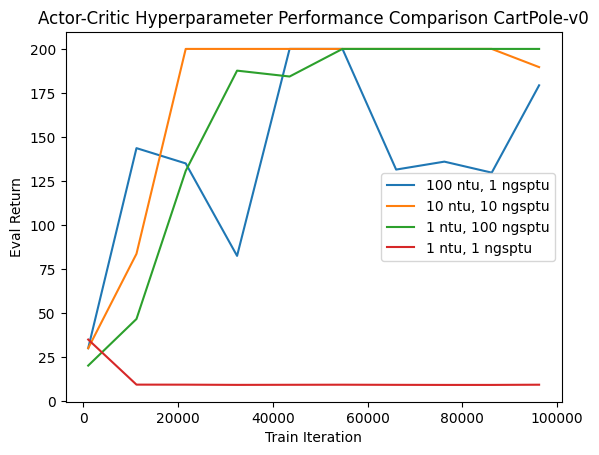

In [13]:
plt.plot(X, list(Y_100_1), label='100 ntu, 1 ngsptu')
plt.plot(X, list(Y_10_10), label='10 ntu, 10 ngsptu')
plt.plot(X, list(Y_1_100), label='1 ntu, 100 ngsptu')
plt.plot(X, list(Y_1_1), label='1 ntu, 1 ngsptu')
plt.xlabel('Train Iteration')
plt.ylabel('Eval Return')

plt.legend()
plt.title('Actor-Critic Hyperparameter Performance Comparison CartPole-v0')
plt.savefig('images/Q4.png', dpi=300)

In [35]:
path = find_event('q5')
path

['.\\data\\q5_10_10_HalfCheetah-v4_08-10-2022_18-33-06\\events.out.tfevents.1665279186.DESKTOP-NE5DITM',
 '.\\data\\q5_10_10_InvertedPendulum-v4_08-10-2022_17-39-02\\events.out.tfevents.1665275942.DESKTOP-NE5DITM']

In [36]:
Y_h = get_section_results(path[0])[1]
Y_i = get_section_results(path[1])[1]
X_h = get_section_results(path[0])[0]
X_i = get_section_results(path[1])[0]

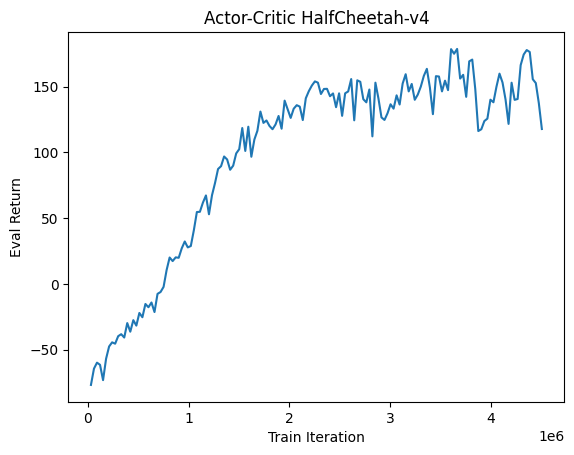

In [37]:
plt.plot(X_h, list(Y_h))

plt.xlabel('Train Iteration')
plt.ylabel('Eval Return')

plt.title('Actor-Critic HalfCheetah-v4')
plt.savefig('images/Q5_1.png', dpi=300)

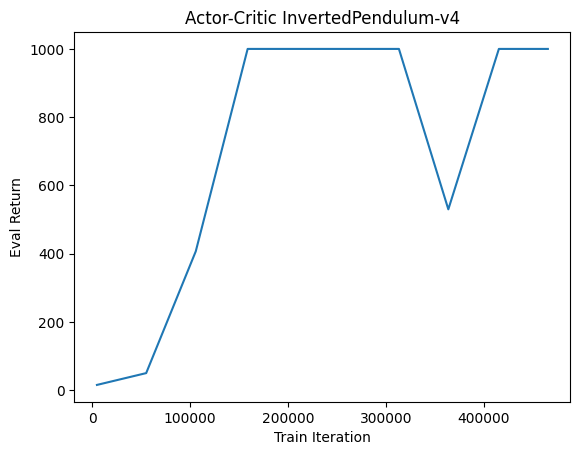

In [38]:
plt.plot(X_i, list(Y_i))

plt.xlabel('Train Iteration')
plt.ylabel('Eval Return')

plt.title('Actor-Critic InvertedPendulum-v4')
plt.savefig('images/Q5_2.png', dpi=300)

In [4]:
path = find_event('q6')
path

['.\\data\\q6a_sac_InvertedPendulum_1_InvertedPendulum-v4_11-10-2022_21-20-52\\events.out.tfevents.1665548452.DESKTOP-NE5DITM',
 '.\\data\\q6a_sac_InvertedPendulum_1_InvertedPendulum-v4_19-10-2022_16-01-08\\events.out.tfevents.1666220468.DESKTOP-NE5DITM',
 '.\\data\\q6b_sac_HalfCheetah_1_HalfCheetah-v4_11-10-2022_22-31-55\\events.out.tfevents.1665552715.DESKTOP-NE5DITM',
 '.\\data\\q6b_sac_HalfCheetah_1_HalfCheetah-v4_17-10-2022_23-59-37\\events.out.tfevents.1666076377.DESKTOP-NE5DITM',
 '.\\data\\q6b_sac_HalfCheetah_1_HalfCheetah-v4_18-10-2022_00-02-23\\events.out.tfevents.1666076543.DESKTOP-NE5DITM',
 '.\\data\\q6b_sac_HalfCheetah_1_HalfCheetah-v4_19-10-2022_00-59-23\\events.out.tfevents.1666166363.DESKTOP-NE5DITM']

In [5]:
Y_h = get_section_results(path[-1])[1]
Y_i = get_section_results(path[1])[1]
X_h = get_section_results(path[-1])[0]
X_i = get_section_results(path[1])[0]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


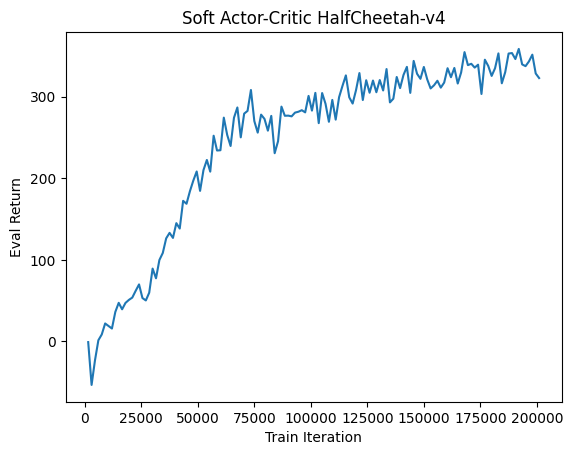

In [6]:
plt.plot(X_h, list(Y_h))

plt.xlabel('Train Iteration')
plt.ylabel('Eval Return')

plt.title('Soft Actor-Critic HalfCheetah-v4')
plt.savefig('images/Q6_1.png', dpi=300)

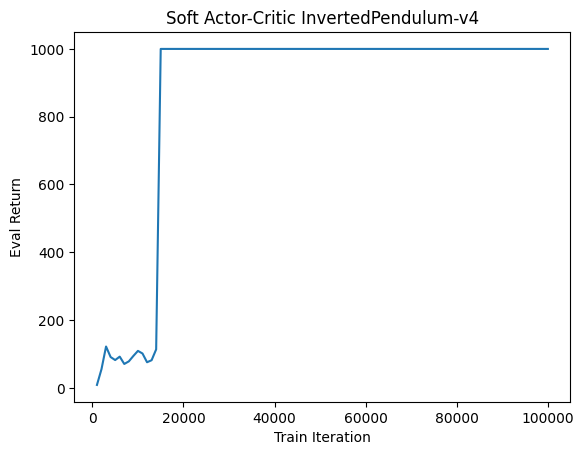

In [7]:
plt.plot(X_i, list(Y_i))

plt.xlabel('Train Iteration')
plt.ylabel('Eval Return')

plt.title('Soft Actor-Critic InvertedPendulum-v4')
plt.savefig('images/Q6_2.png', dpi=300)